# **Team BADI - Bias in Home Mortgage Bank Loans**

Project Goal: Create a CNN model for predicting whether a customer is eligible for a home loan or not using important features like 'ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History'. We will also clean the data, create visualizations, describe the importance of our features, and analyze fairness using aequitas. 

In [ ]:
!pip install opendatasets
import opendatasets as od

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
od.download('https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset')

Skipping, found downloaded files in "./loan-eligible-dataset" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
loans = pd.read_csv('/content/loan-eligible-dataset/loan-train.csv')

# **Dataset preview**

Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

[Loans Eligible Dataset](https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset?datasetId=831855&searchQuery=random+forest)


In [ ]:
loans.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("Shape: ", loans.shape)

Shape:  (614, 13)


In [ ]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
loans.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# **Data Cleaning & Manipulation**


In [ ]:
loans.drop('Loan_ID', axis=1, inplace=True)
loans.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loans['Credit_History'].fillna(0, inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loans['Dependents'].fillna('0', inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loans['Self_Employed'].fillna('No', inplace=True)
loans.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loans['Gender'].fillna('unknown', inplace=True)
loans['Married'].fillna('unknown', inplace=True)
loans.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
len(loans)

614

# **Data Visualization**

<Axes: >

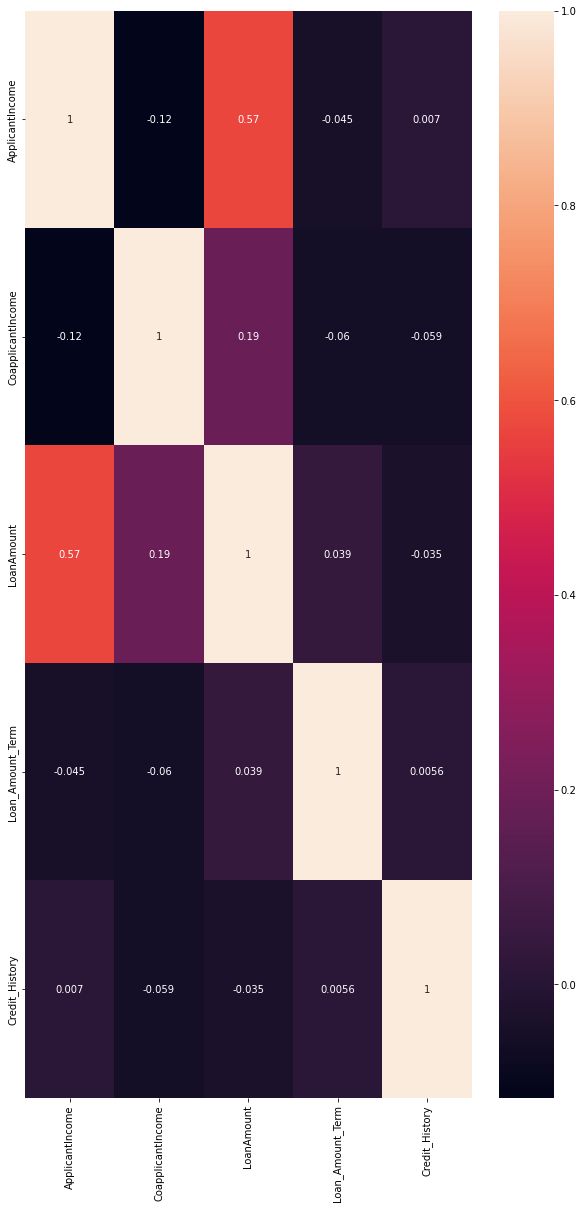

In [ ]:
sns.heatmap(loans.corr(), annot = True)

In [ ]:
pip install association-metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<Axes: >

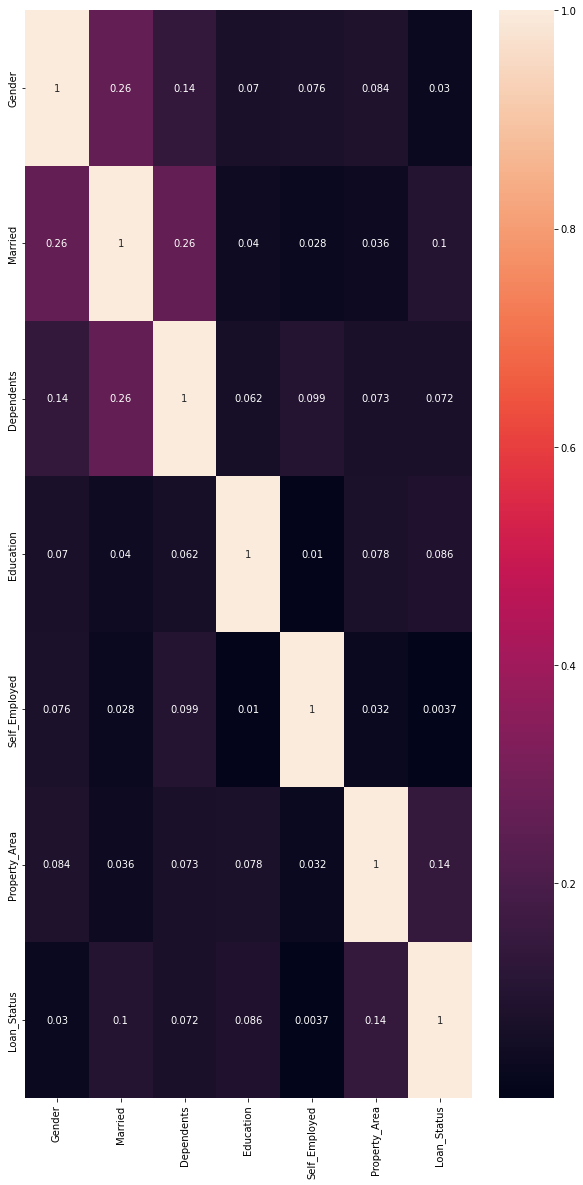

In [ ]:
import association_metrics as am
loans2 = loans.apply(lambda x: x.astype("category") if x.dtype == "O" else x)
cramersv = am.CramersV(loans2) 
sns.heatmap(cramersv.fit(), annot = True)

In [ ]:
ct = pd.crosstab(index = loans.Gender, columns = loans.Loan_Status)
ct

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339
unknown,5,8


In [ ]:
from scipy.stats import chi2_contingency
chisq = chi2_contingency(ct)
chisq[1]

0.7573361980618397

<Axes: xlabel='Loan_Status', ylabel='count'>

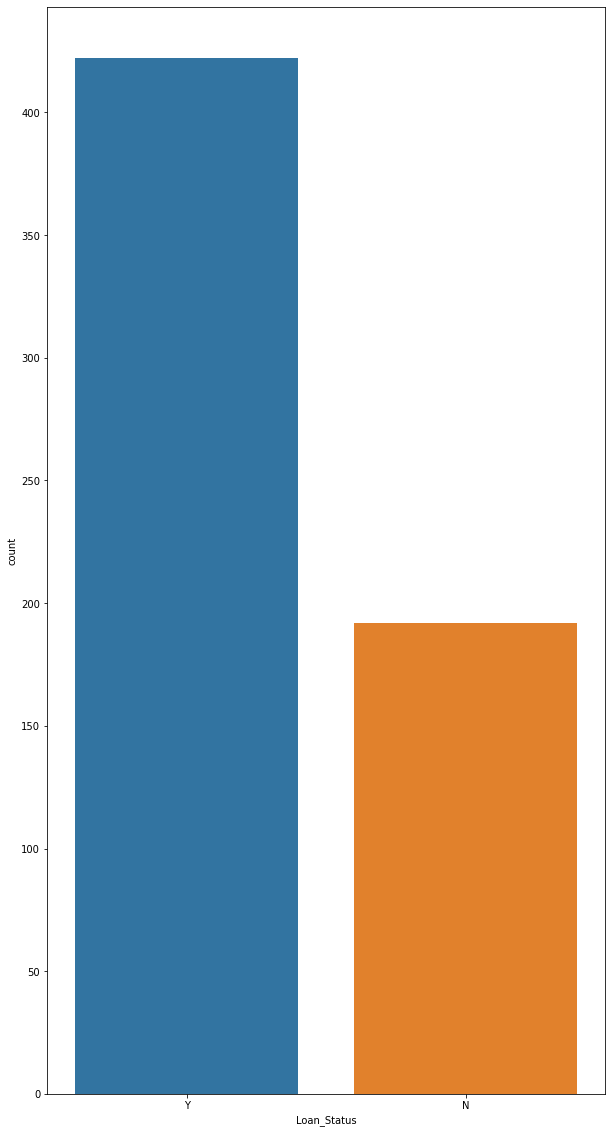

In [ ]:
sns.countplot(data = loans, x = 'Loan_Status')

<Axes: xlabel='Gender', ylabel='count'>

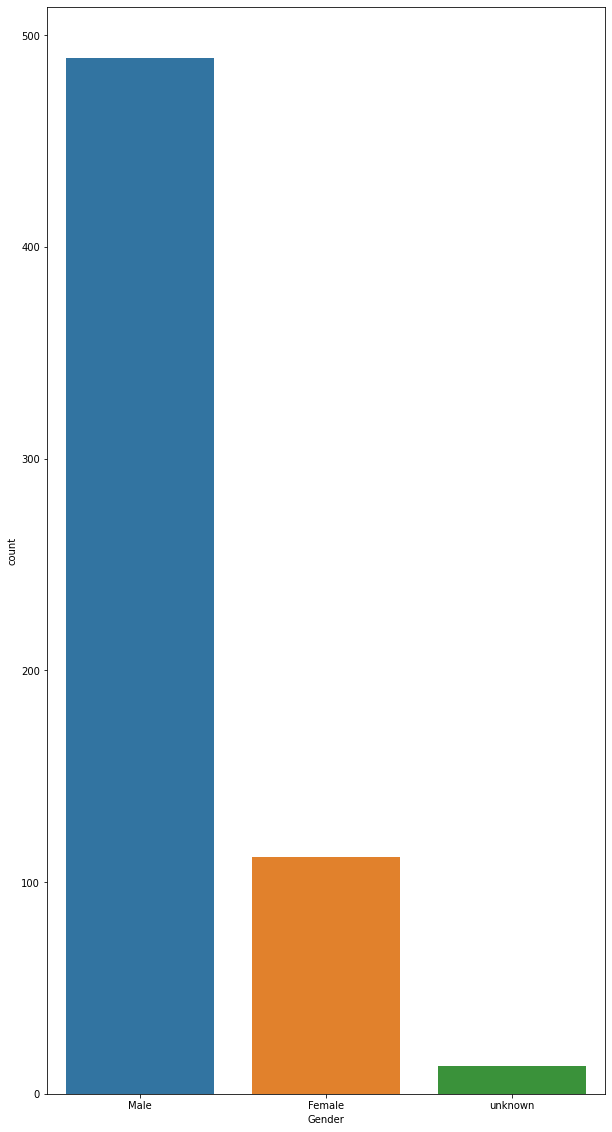

In [ ]:
sns.countplot(data = loans, x = 'Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

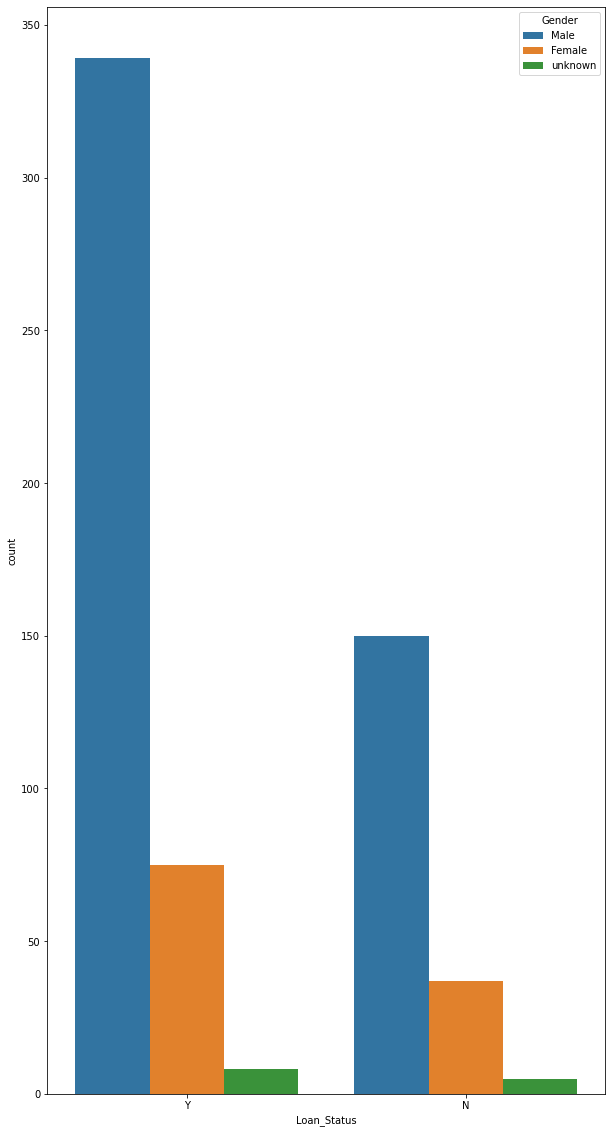

In [ ]:
sns.countplot(data = loans, x = 'Loan_Status', hue = 'Gender')

<Axes: xlabel='Loan_Status', ylabel='count'>

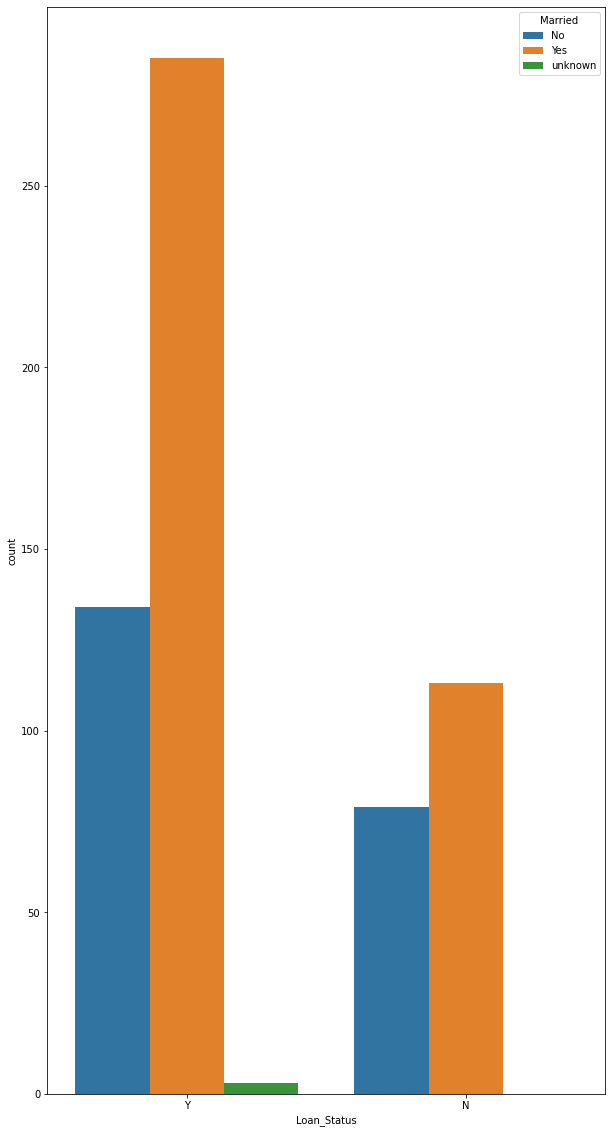

In [ ]:
sns.countplot(data = loans, x = 'Loan_Status', hue = 'Married')

<Axes: xlabel='Education', ylabel='count'>

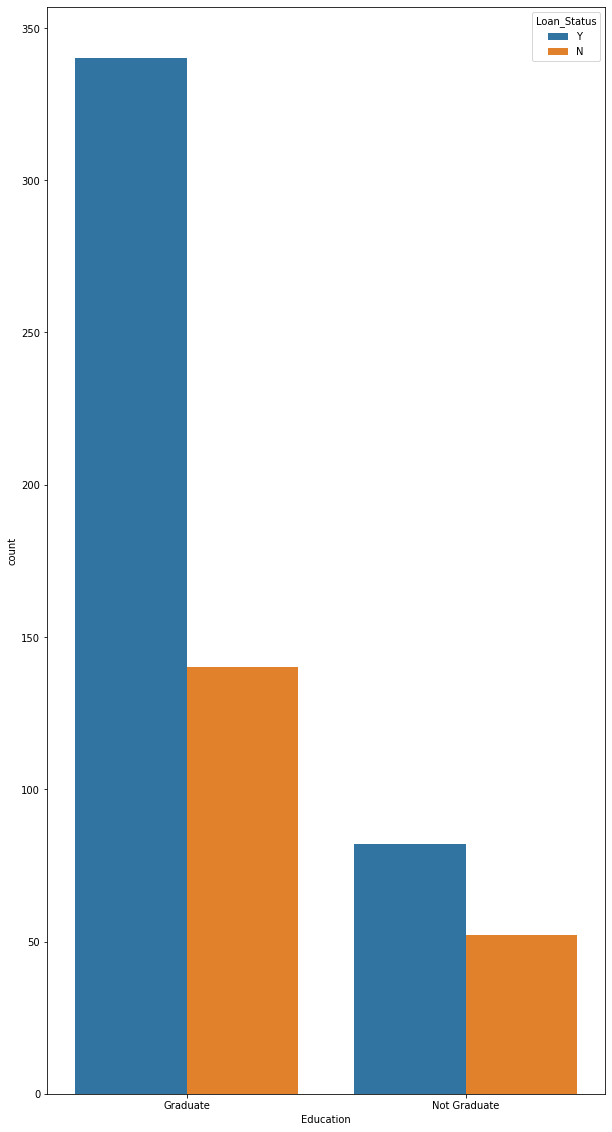

In [ ]:
sns.countplot(data = loans, x = 'Education', hue = 'Loan_Status')

<Axes: xlabel='LoanAmount', ylabel='Count'>

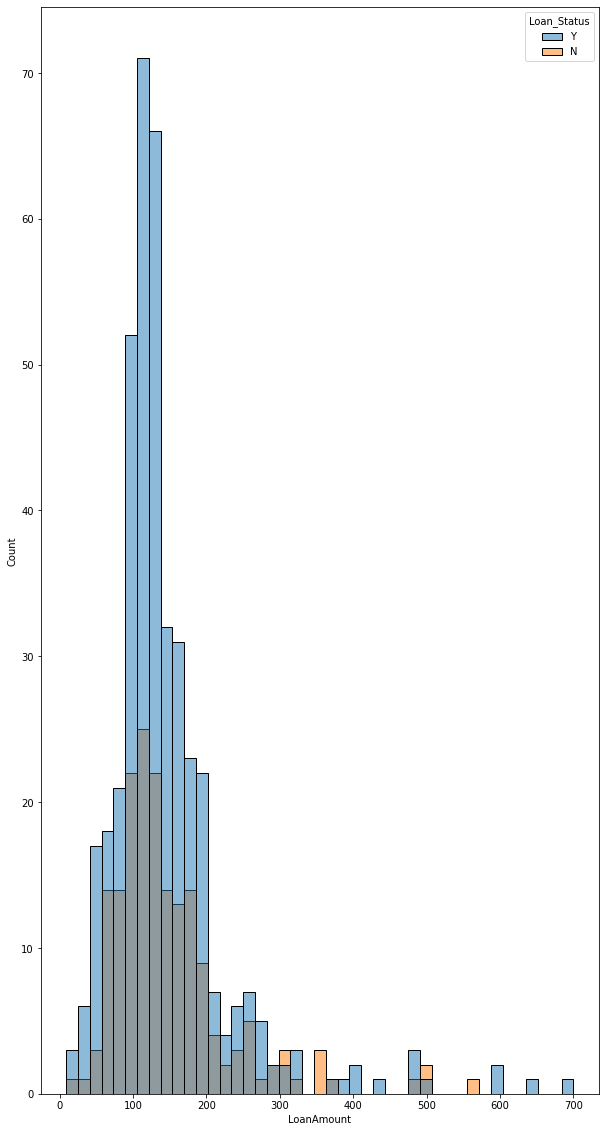

In [ ]:
sns.histplot(data = loans, x = 'LoanAmount', hue = 'Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

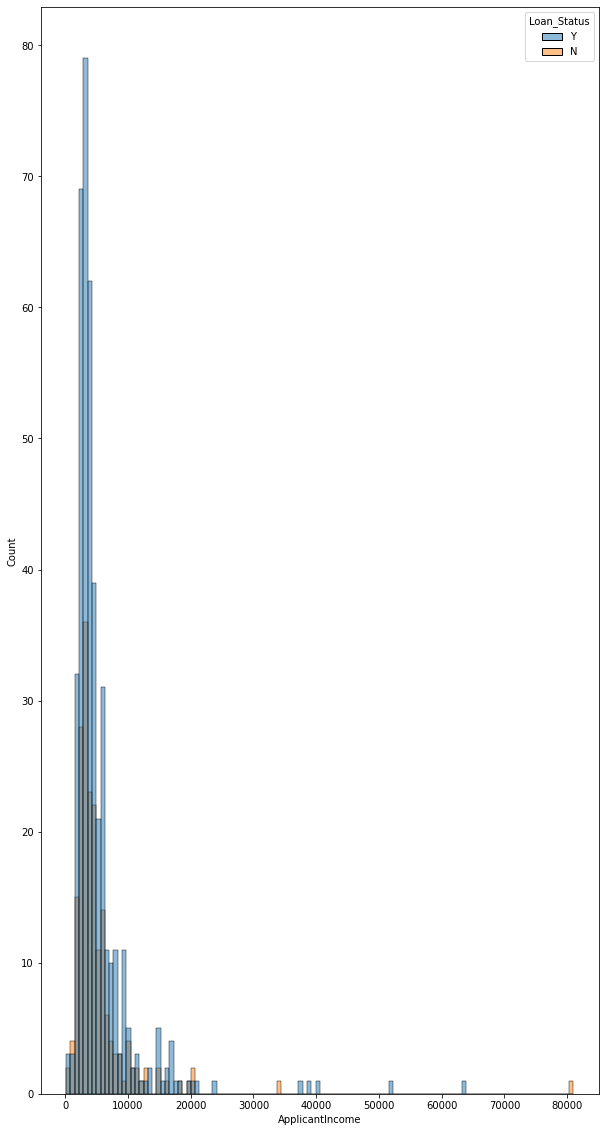

In [ ]:
sns.histplot(data = loans, x = 'ApplicantIncome', hue = 'Loan_Status')

<Axes: xlabel='Dependents', ylabel='count'>

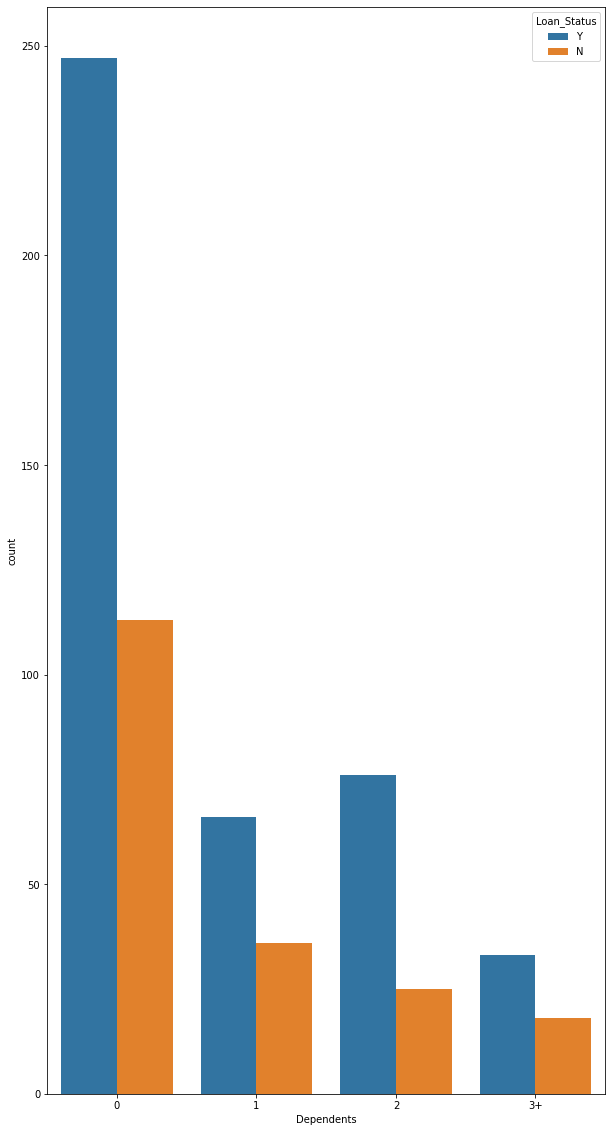

In [ ]:
sns.countplot(data = loans, x = 'Dependents', hue = 'Loan_Status')

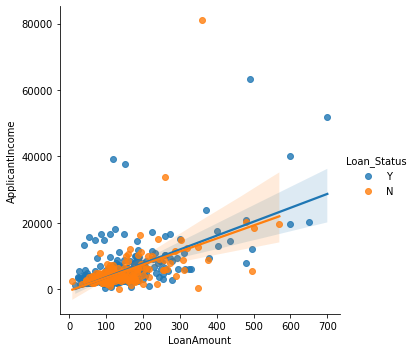

In [ ]:
sns.lmplot(data = loans, x = 'LoanAmount', y = 'ApplicantIncome', hue = 'Loan_Status')

<Axes: xlabel='Property_Area', ylabel='count'>

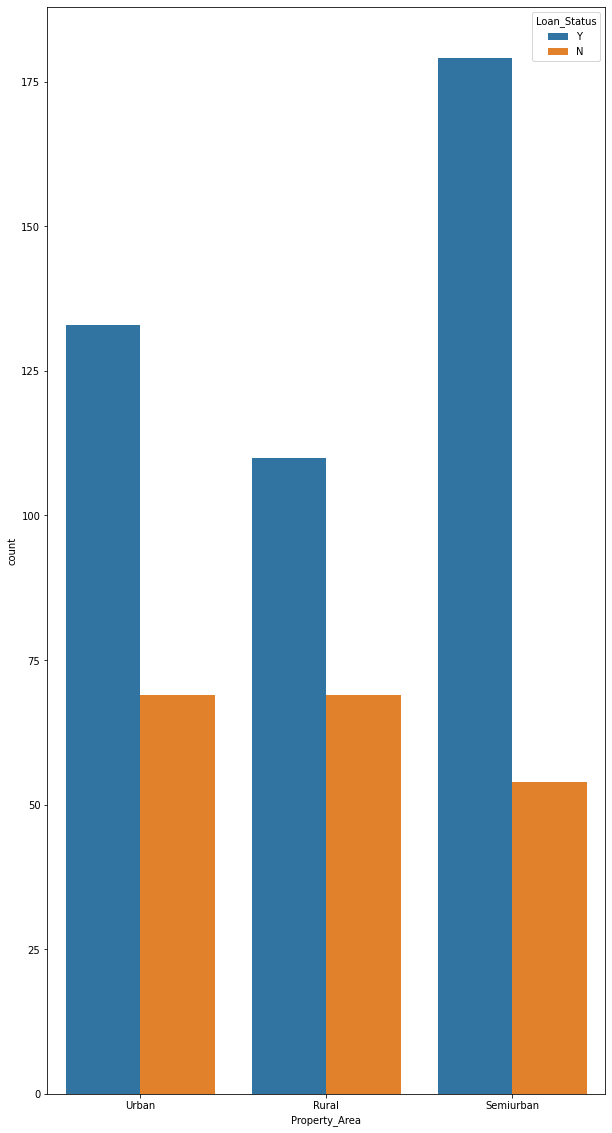

In [ ]:
sns.countplot(data = loans, x = 'Property_Area', hue = 'Loan_Status')

<Axes: xlabel='LoanAmount', ylabel='Loan_Amount_Term'>

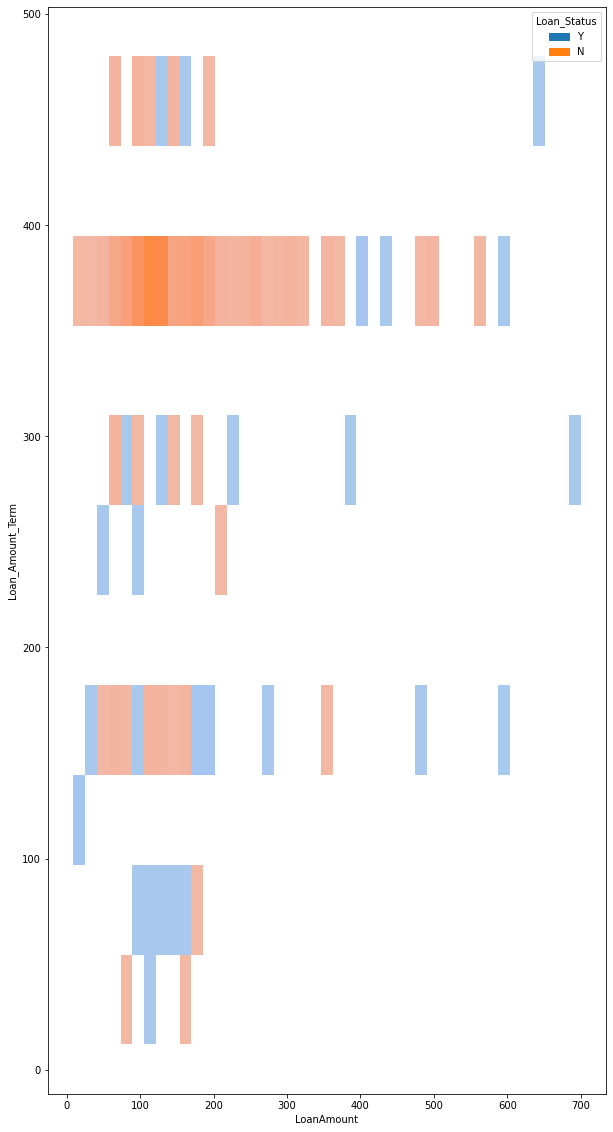

In [ ]:
sns.histplot(data = loans, x = 'LoanAmount', y = 'Loan_Amount_Term', hue = 'Loan_Status')

<Axes: xlabel='Credit_History', ylabel='count'>

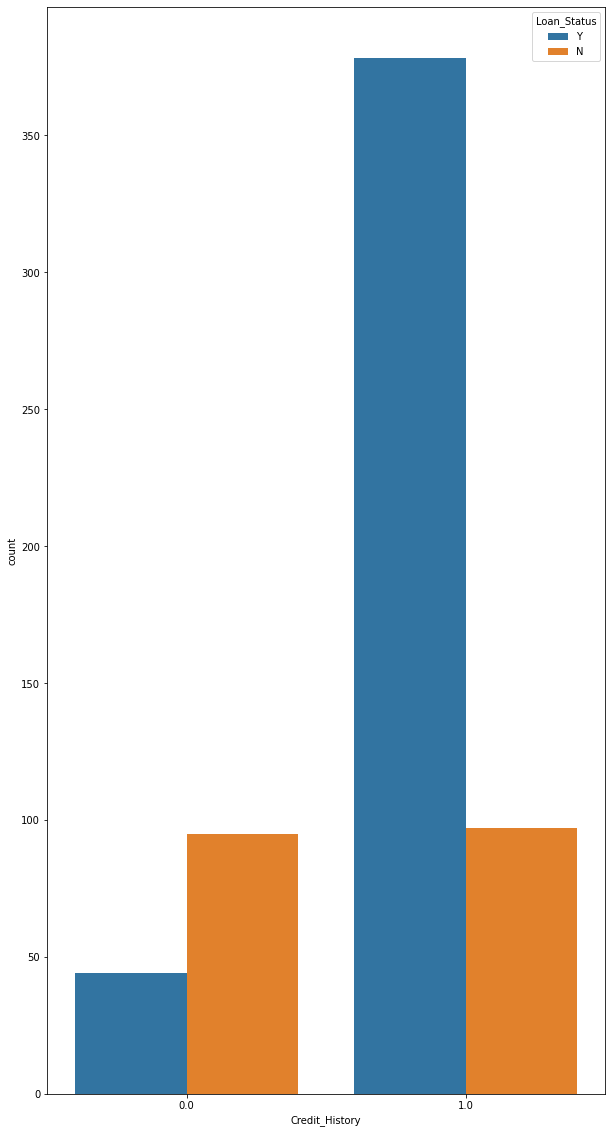

In [ ]:
sns.countplot(data = loans, x = 'Credit_History', hue = 'Loan_Status')

<Axes: xlabel='Self_Employed', ylabel='count'>

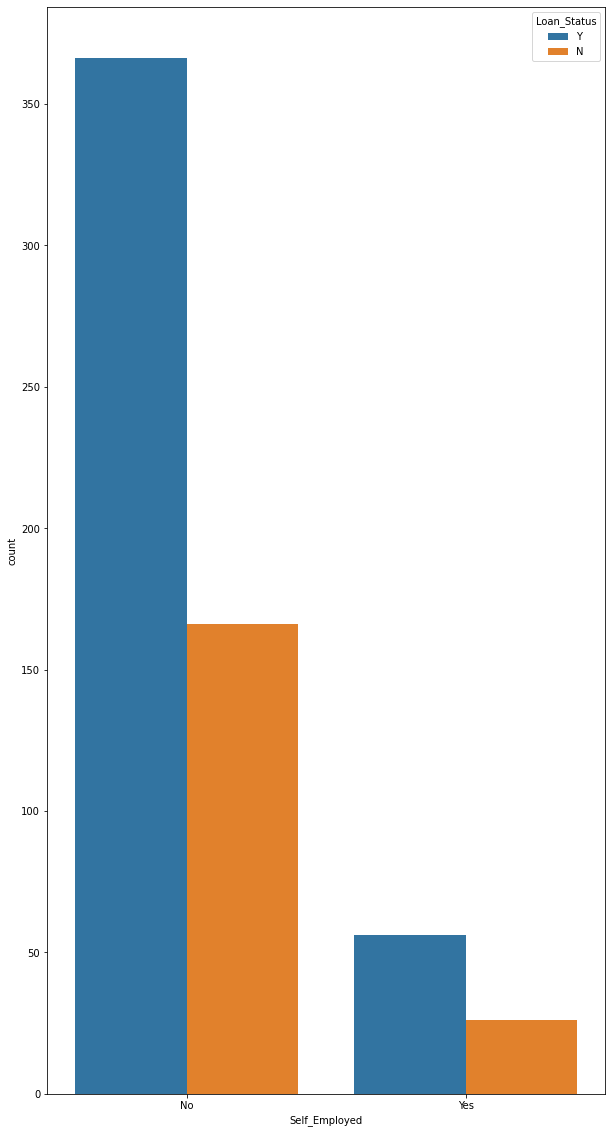

In [ ]:
sns.countplot(data = loans, x = 'Self_Employed', hue = 'Loan_Status')

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

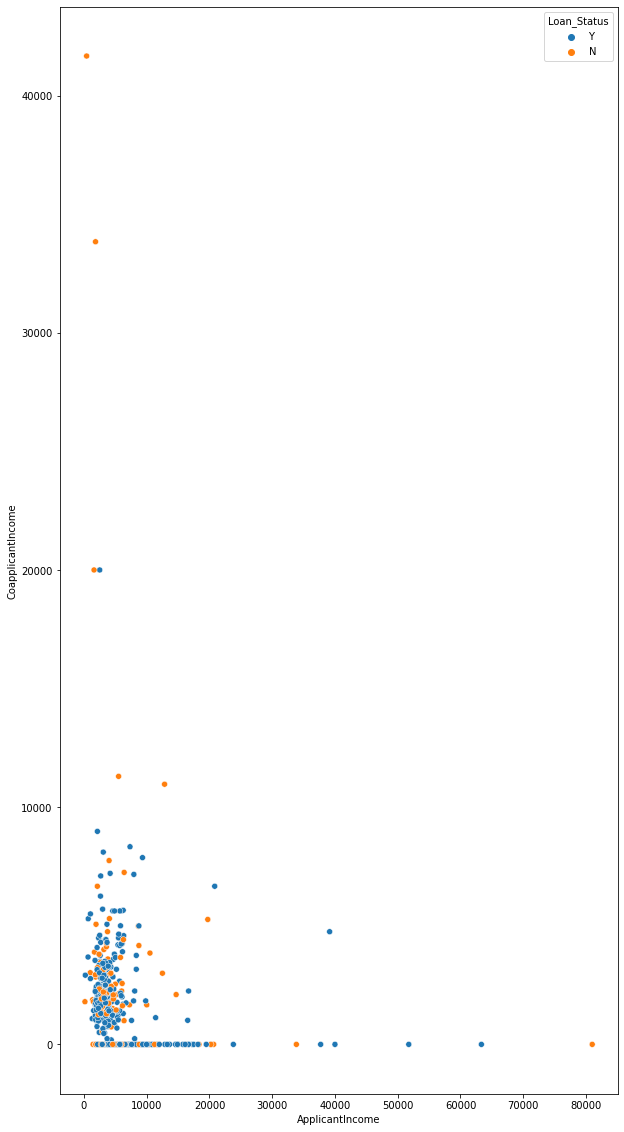

In [ ]:
sns.scatterplot(data = loans, x = 'ApplicantIncome', y = 'CoapplicantIncome', hue = 'Loan_Status')

# **Feature Importance**


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To better understand which features on our dataset are best at predicting the target `Loan_Status`, we decided to use XGBoost Classifier to determine which features have higher importance for predicting the target `Loan_Status` 

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost
from xgboost import plot_importance

In [ ]:
feature_names = loans.columns[:-1]

In [ ]:
feature_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

Here, we mapped our labels for the target:

In [ ]:
labels = loans.iloc[:,-1]
le = LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_
data = loans.iloc[:,:-1]
le_label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class names: ", class_names)
print("Label mapping: ", le_label_mapping)

Class names:  ['N' 'Y']
Label mapping:  {'N': 0, 'Y': 1}


In [ ]:
labels

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

Here, we checked if there are categorical varibles that we need to make dummies for, and generated a list of which variables are categorical

In [ ]:
print(data.dtypes)

categorical_features  = [i for i in range(len(data.dtypes)) if data.dtypes[i]=='object']
print("Indices of categorical features: ", categorical_features)

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object
Indices of categorical features:  [0, 1, 2, 3, 4, 10]


Here, we used LabelEncoder to map categories to numbers, and replaced the categories with corresponding numbers in the original data

In [ ]:
categorical_names = {}
for feature in categorical_features:
    print("Feature: ", feature)
    le = LabelEncoder()
    le.fit(loans.iloc[:, feature])
    loans.iloc[:, feature] = le.transform(loans.iloc[:, feature])
    categorical_names[feature] = le.classes_
    print(categorical_names[feature])
    print("==================================================")

Feature:  0
['Female' 'Male' 'unknown']
Feature:  1
['No' 'Yes' 'unknown']
Feature:  2
['0' '1' '2' '3+']
Feature:  3
['Graduate' 'Not Graduate']
Feature:  4
['No' 'Yes']
Feature:  10
['Rural' 'Semiurban' 'Urban']


In [ ]:
categorical_names

{0: array(['Female', 'Male', 'unknown'], dtype=object),
 1: array(['No', 'Yes', 'unknown'], dtype=object),
 2: array(['0', '1', '2', '3+'], dtype=object),
 3: array(['Graduate', 'Not Graduate'], dtype=object),
 4: array(['No', 'Yes'], dtype=object),
 10: array(['Rural', 'Semiurban', 'Urban'], dtype=object)}

Here, we fit our encoder, using the adjusted `loan` data (we stored the adjusted version into `data`)

In [ ]:
encoder = ColumnTransformer(transformers=[('get_dummies', OneHotEncoder(), categorical_features)], remainder='passthrough')
encoder = encoder.fit(data)

In [ ]:
train, test, labels_train, labels_test = train_test_split(data, labels, train_size=0.90, random_state=10)
print("Train shape: ", train.shape)
print("Test shape: ", test.shape)

Train shape:  (552, 11)
Test shape:  (62, 11)


In [ ]:
labels_train[1:100]

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1])

Here, we fit the XGBoost Tree Classifier with our data, performed an accuracy test, and checked which features are important to help us determine the target. 

In [ ]:
gbtree = xgboost.XGBClassifier(n_estimators=100, max_depth=5)
gbtree.fit(encoder.transform(train), labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_labels_test = gbtree.predict(encoder.transform(test))

print("Test set accuracy: ", accuracy_score(labels_test, pred_labels_test))

Test set accuracy:  0.7419354838709677


0
1
2
3
4
10


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

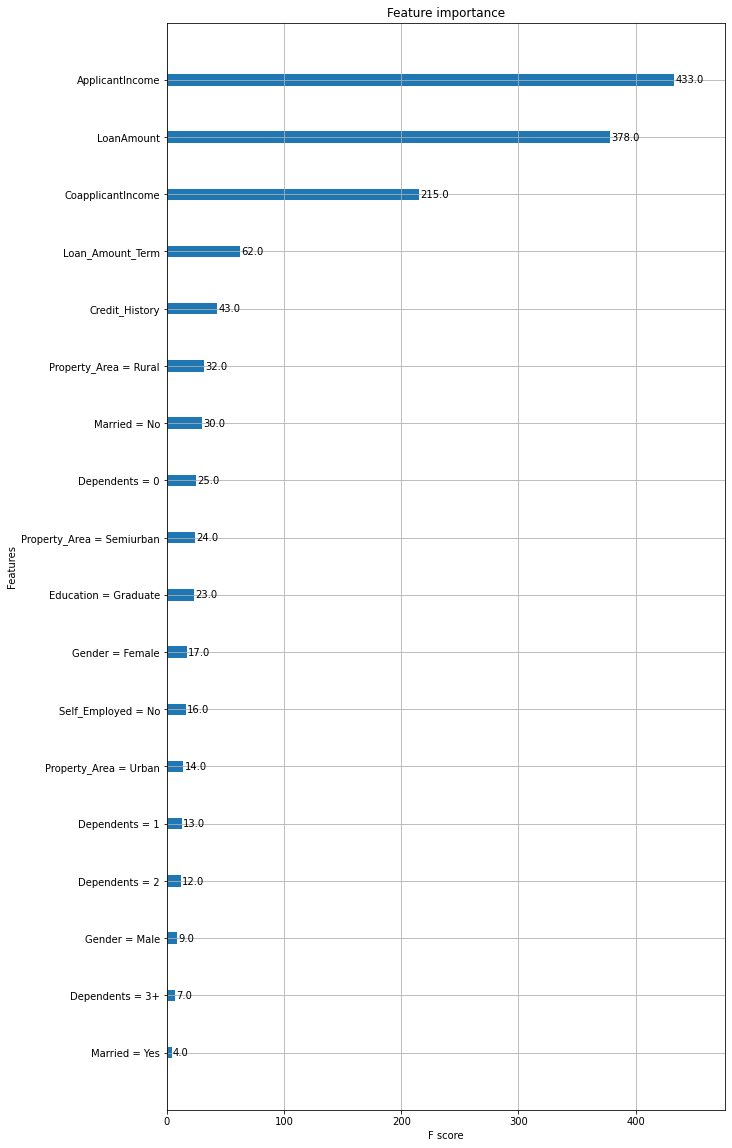

In [ ]:
gbtree_features_orig = gbtree.get_booster().feature_names
gbtree_features = []

for cat_var in categorical_names:
  print(cat_var)
  cat_var_names = [feature_names[cat_var] +" = " + cat for cat in categorical_names[cat_var]]
  gbtree_features.extend(cat_var_names)
gbtree_features.extend([feature_names[i] for i in range(len(feature_names)) if i not in categorical_features])
gbtree.get_booster().feature_names = gbtree_features

plt.rcParams["figure.figsize"] = (10,20)
plot_importance(gbtree.get_booster(), )

# **Training the CNN Model**

After using XGBoost Classifier to find important features, we decided to train a Convolutional Neural Network(CNN) model where we train it using important features such as `ApplicantIncome`, `LoanAmount`, `CoapplicantIncome`, `Loan_Amount_Term`, and `Credit_History` in order to predict whether a customer is eligible for a home loan.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import load_model

In [ ]:
data2 = data[['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term', 'Credit_History']]
data2.head()

,ApplicantIncome,LoanAmount,CoapplicantIncome,Loan_Amount_Term,Credit_History
0,5849,NaN,0.0,360.0,1.0
1,4583,128.0,1508.0,360.0,1.0
2,3000,66.0,0.0,360.0,1.0
3,2583,120.0,2358.0,360.0,1.0
4,6000,141.0,0.0,360.0,1.0


I realize the remaining missing values will cause issues later on, so I removed the rows correlating to missing values. I did it both for the `data` and `label` and stored the results in `data2` and `label2`.

In [ ]:
indices_with_missing_data = data2[data2.isnull().any(axis=1)].index
print(indices_with_missing_data)

Int64Index([  0,  19,  35,  36,  44,  45,  63,  73,  81,  95, 102, 103, 112,
            113, 127, 165, 197, 202, 223, 232, 284, 305, 322, 335, 338, 367,
            387, 421, 423, 435, 437, 479, 524, 550, 551, 605],
           dtype='int64')


In [ ]:
data2.dropna(subset=['LoanAmount', 'Loan_Amount_Term'], inplace=True)
data2.shape

<ipython-input-141-316d79359c2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.dropna(subset=['LoanAmount', 'Loan_Amount_Term'], inplace=True)


(578, 5)

In [ ]:
labels2 = np.delete(labels, indices_with_missing_data)
len(labels2)

578

We decided on splitting the data again, with 10% of the data being used for testing. We've then normalized the data using `MinMaxScaler()` to transform the data into something thats suitable for our model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.20, random_state=101)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

There's only an input layer and an output layer for our CNN model. Usually its a rule of thumb that the number of neurons in the input layer equates to the number of features that you're inputting. That's 5 neurons, and to simulate a bias term, I used 6 neurons.

The output layer consists of just 1 neuron. We compile the model with the `binary_crossentropy` loss and the `adam` optimizer, and then fitted the model for 10 epochs.

In [ ]:
model = Sequential()

# input layer
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
15/15 [==============================] - 1s 13ms/step - loss: 0.6352 - val_loss: 0.6445
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6287
Epoch 3/10
15/15 [==============================] - 0s 5ms/step - loss: 0.6214 - val_loss: 0.6161
Epoch 4/10
15/15 [==============================] - 0s 7ms/step - loss: 0.6110 - val_loss: 0.6071
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6047 - val_loss: 0.5995
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5972 - val_loss: 0.5934
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5873 - val_loss: 0.5874
Epoch 8/10
15/15 [==============================] - 0s 6ms/step - loss: 0.5895 - val_loss: 0.5826
Epoch 9/10
15/15 [==============================] - 0s 11ms/step - loss: 0.5818 - val_loss: 0.5789
Epoch 10/10
15/15 [==============================] - 0s 21ms/step - loss: 0.5874 - val_loss: 0.5758


<Axes: >

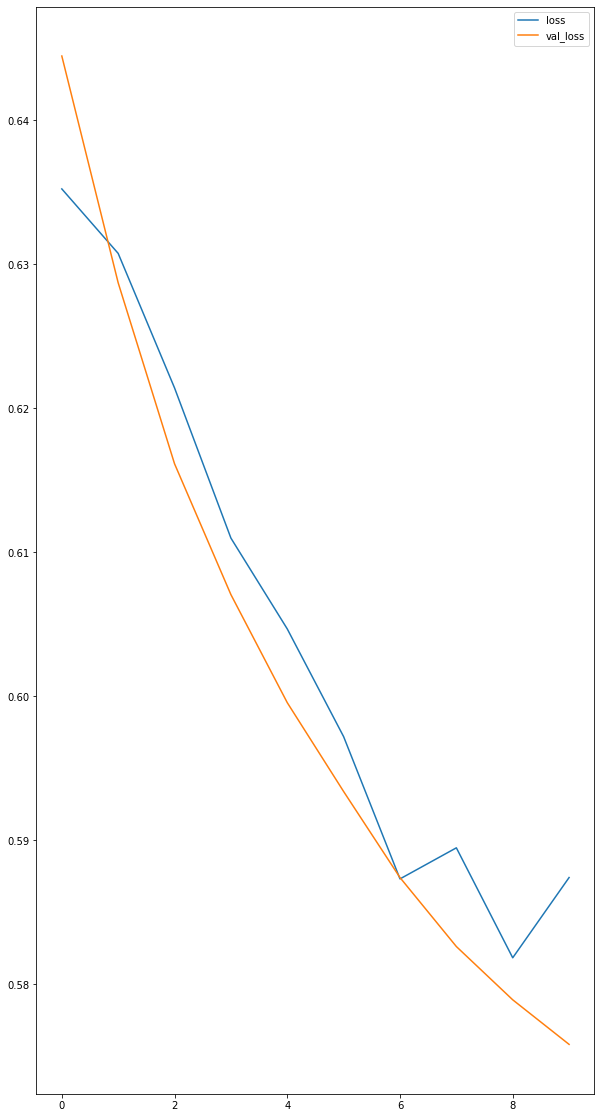

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

Overall, our accuracy for our model lies at 68%, which isn't too shabby, but there's definitely room for improvement.

In [ ]:
predictions = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test,predictions))

4/4 [==============================] - 0s 9ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.68      1.00      0.81        79

    accuracy                           0.68       116
   macro avg       0.34      0.50      0.41       116
weighted avg       0.46      0.68      0.55       116



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from tensorflow.keras.models import load_model
model.save('synthethic_loan_model.h5')

# **Analyzing Fairness using Aequitas** 



We will analyze fairness with respect to different metrics in order to evaluate whether our CNN model produces biased or unbiased results across the different features. The fairness of the model is being analyzed by examining the aequitas libraries' results of the model's predictions of the test data based on the different features.



In [ ]:
pip install aequitas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot

We created a new dataframe called test_df to transform the scaled data back to the original scale using the function: scaler.inverse_transform(). We will be using the new 'test_df' to analyze fairness. We then added 3 new categorical columns to group our data by certain ranges for the ApplicantIncome, LoanAmount, and CoapplicantIncome features. 

In [ ]:
test_df = pd.DataFrame(scaler.inverse_transform(X_test), columns = ['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome', 'Loan_Amount_Term','Credit_History'])
test_df['score'] = predictions
test_df['label_value'] = y_test

test_df['ApplicantIncome_cat'] = 'less than 3000'
test_df.loc[(test_df["ApplicantIncome"] > 3000) & (test_df["ApplicantIncome"] <= 5000), "ApplicantIncome_cat"] = '3000 - 5000'
test_df.loc[test_df["ApplicantIncome"] > 5000, "ApplicantIncome_cat"] = 'greater than 5000'

test_df['LoanAmount_cat'] = 'less than 100'
test_df.loc[(test_df["LoanAmount"] > 100) & (test_df["LoanAmount"] <= 300), "LoanAmount_cat"] = '100 - 300'
test_df.loc[test_df["LoanAmount"] > 300, "LoanAmount_cat"] = 'greater than 300'

# .describe is used to get summary statistics of CoapplicantIncome column
test_df['CoapplicantIncome'].describe().loc[['min', '25%', '50%', '75%', 'max']]
test_df['CoapplicantIncome_cat'] = 'equals zero'
test_df.loc[(test_df["CoapplicantIncome"] > 0) & (test_df["CoapplicantIncome"] <= 1000), "CoapplicantIncome_cat"] = 'less than 1000'
test_df.loc[(test_df["CoapplicantIncome"] > 1000) & (test_df["CoapplicantIncome"] <= 2000), "CoapplicantIncome_cat"] = '1000 - 2000'
test_df.loc[test_df["CoapplicantIncome"] > 2000, "CoapplicantIncome_cat"] = 'greater than 2000'

# remove ApplicantIncome, LoanAmount, and CoapplicantIncome columns from our dataframe 
test_df.pop("ApplicantIncome")
test_df.pop("LoanAmount")
test_df.pop("CoapplicantIncome")

test_df.head(10)

,Loan_Amount_Term,Credit_History,score,label_value,ApplicantIncome_cat,LoanAmount_cat,CoapplicantIncome_cat
0,480.0,1.0,1,1,3000 - 5000,100 - 300,equals zero
1,120.0,1.0,1,1,3000 - 5000,less than 100,equals zero
2,360.0,1.0,1,1,3000 - 5000,100 - 300,greater than 2000
3,360.0,1.0,1,1,3000 - 5000,100 - 300,equals zero
4,360.0,1.0,1,1,greater than 5000,100 - 300,equals zero
5,360.0,1.0,1,1,3000 - 5000,100 - 300,equals zero
6,360.0,1.0,1,1,3000 - 5000,100 - 300,greater than 2000
7,360.0,1.0,1,1,greater than 5000,100 - 300,greater than 2000
8,360.0,0.0,1,0,3000 - 5000,100 - 300,greater than 2000
9,360.0,1.0,1,1,3000 - 5000,100 - 300,equals zero


In [ ]:
# convert to strings, we want to compare groups based on their representation within categorical variables, not numerical values 
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].astype(str)
test_df['Credit_History'] = test_df['Credit_History'].astype(str)

In [ ]:
# evaluates bias for all subgroups
g = Group()
xtab, _ = g.get_crosstabs(test_df)

In [ ]:
absolute_metrics = g.list_absolute_metrics(xtab)

These are the counts across sample population groups.

In [ ]:
# selects only the columns in the xtab table that represent the different features, and excludes the columns that represent the fairness metrics
xtab[[col for col in xtab.columns if col not in absolute_metrics]]

,model_id,score_threshold,k,attribute_name,attribute_value,pp,pn,fp,fn,tn,tp,group_label_pos,group_label_neg,group_size,total_entities
0,0,binary 0/1,116,Loan_Amount_Term,120.0,1,0,0,0,0,1,1,0,1,116
1,0,binary 0/1,116,Loan_Amount_Term,180.0,5,0,1,0,0,4,4,1,5,116
2,0,binary 0/1,116,Loan_Amount_Term,300.0,3,0,2,0,0,1,1,2,3,116
3,0,binary 0/1,116,Loan_Amount_Term,360.0,104,0,33,0,0,71,71,33,104,116
4,0,binary 0/1,116,Loan_Amount_Term,480.0,2,0,1,0,0,1,1,1,2,116
5,0,binary 0/1,116,Loan_Amount_Term,84.0,1,0,0,0,0,1,1,0,1,116
6,0,binary 0/1,116,Credit_History,0.0,24,0,20,0,0,4,4,20,24,116
7,0,binary 0/1,116,Credit_History,1.0,92,0,17,0,0,75,75,17,92,116
8,0,binary 0/1,116,ApplicantIncome_cat,3000 - 5000,45,0,12,0,0,33,33,12,45,116
9,0,binary 0/1,116,ApplicantIncome_cat,greater than 5000,41,0,17,0,0,24,24,17,41,116


In [ ]:
# got rid of nan values
clean_xtab = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2).dropna(thresh=len(xtab)*0.9, axis=1)
clean_xtab

,attribute_name,attribute_value,tpr,fdr,fnr,precision,ppr,pprev,prev
0,Loan_Amount_Term,120.0,1.0,0.00,0.0,1.00,0.01,1.0,1.00
1,Loan_Amount_Term,180.0,1.0,0.20,0.0,0.80,0.04,1.0,0.80
2,Loan_Amount_Term,300.0,1.0,0.67,0.0,0.33,0.03,1.0,0.33
3,Loan_Amount_Term,360.0,1.0,0.32,0.0,0.68,0.90,1.0,0.68
4,Loan_Amount_Term,480.0,1.0,0.50,0.0,0.50,0.02,1.0,0.50
5,Loan_Amount_Term,84.0,1.0,0.00,0.0,1.00,0.01,1.0,1.00
6,Credit_History,0.0,1.0,0.83,0.0,0.17,0.21,1.0,0.17
7,Credit_History,1.0,1.0,0.18,0.0,0.82,0.79,1.0,0.82
8,ApplicantIncome_cat,3000 - 5000,1.0,0.27,0.0,0.73,0.39,1.0,0.73
9,ApplicantIncome_cat,greater than 5000,1.0,0.41,0.0,0.59,0.35,1.0,0.59


Bias allows us to measure the extent to which your model's predictions are biased against certain groups.

We calculated disparities in relation to the sample population majority group for each attribute. We did this to evaluate how much more or less other groups are correctly or incorrectly predicted to get mortgage loans in relation to the group with the most data.

In [ ]:
b = Bias()
majority_bdf = b.get_disparity_major_group(xtab, original_df=test_df, mask_significance=True)

get_disparity_major_group()


In [ ]:
# Bias() class includes a method to return a list of calculated disparities from the dataframe returned by the `get_disparity_` methods.
calculated_disparities = b.list_disparities(majority_bdf)
disparity_significance = b.list_significance(majority_bdf)

In [ ]:
# View disparity metrics added to dataframe
# calculated_disparities is a list of disparity metrics calculated such as ppr_disparity, pprev_disparity, fnr_disparity, fpr_disparity
# disparity_significance is a list of boolean values showing whether the disparity metric for each feature is statistically significant (True) or not (False)
majority_bdf[['attribute_name', 'attribute_value'] +  calculated_disparities + disparity_significance].dropna(thresh=len(xtab)*0.9, axis=1)

,attribute_name,attribute_value,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,tpr_disparity
0,Loan_Amount_Term,120.0,0.009615,1.0,1.464789,0.000000,1.0
1,Loan_Amount_Term,180.0,0.048077,1.0,1.171831,0.630303,1.0
2,Loan_Amount_Term,300.0,0.028846,1.0,0.488263,2.101010,1.0
3,Loan_Amount_Term,360.0,1.000000,1.0,1.000000,1.000000,1.0
4,Loan_Amount_Term,480.0,0.019231,1.0,0.732394,1.575758,1.0
5,Loan_Amount_Term,84.0,0.009615,1.0,1.464789,0.000000,1.0
6,Credit_History,0.0,0.260870,1.0,0.204444,4.509804,1.0
7,Credit_History,1.0,1.000000,1.0,1.000000,1.000000,1.0
8,ApplicantIncome_cat,3000 - 5000,1.000000,1.0,1.000000,1.000000,1.0
9,ApplicantIncome_cat,greater than 5000,0.911111,1.0,0.798226,1.554878,1.0


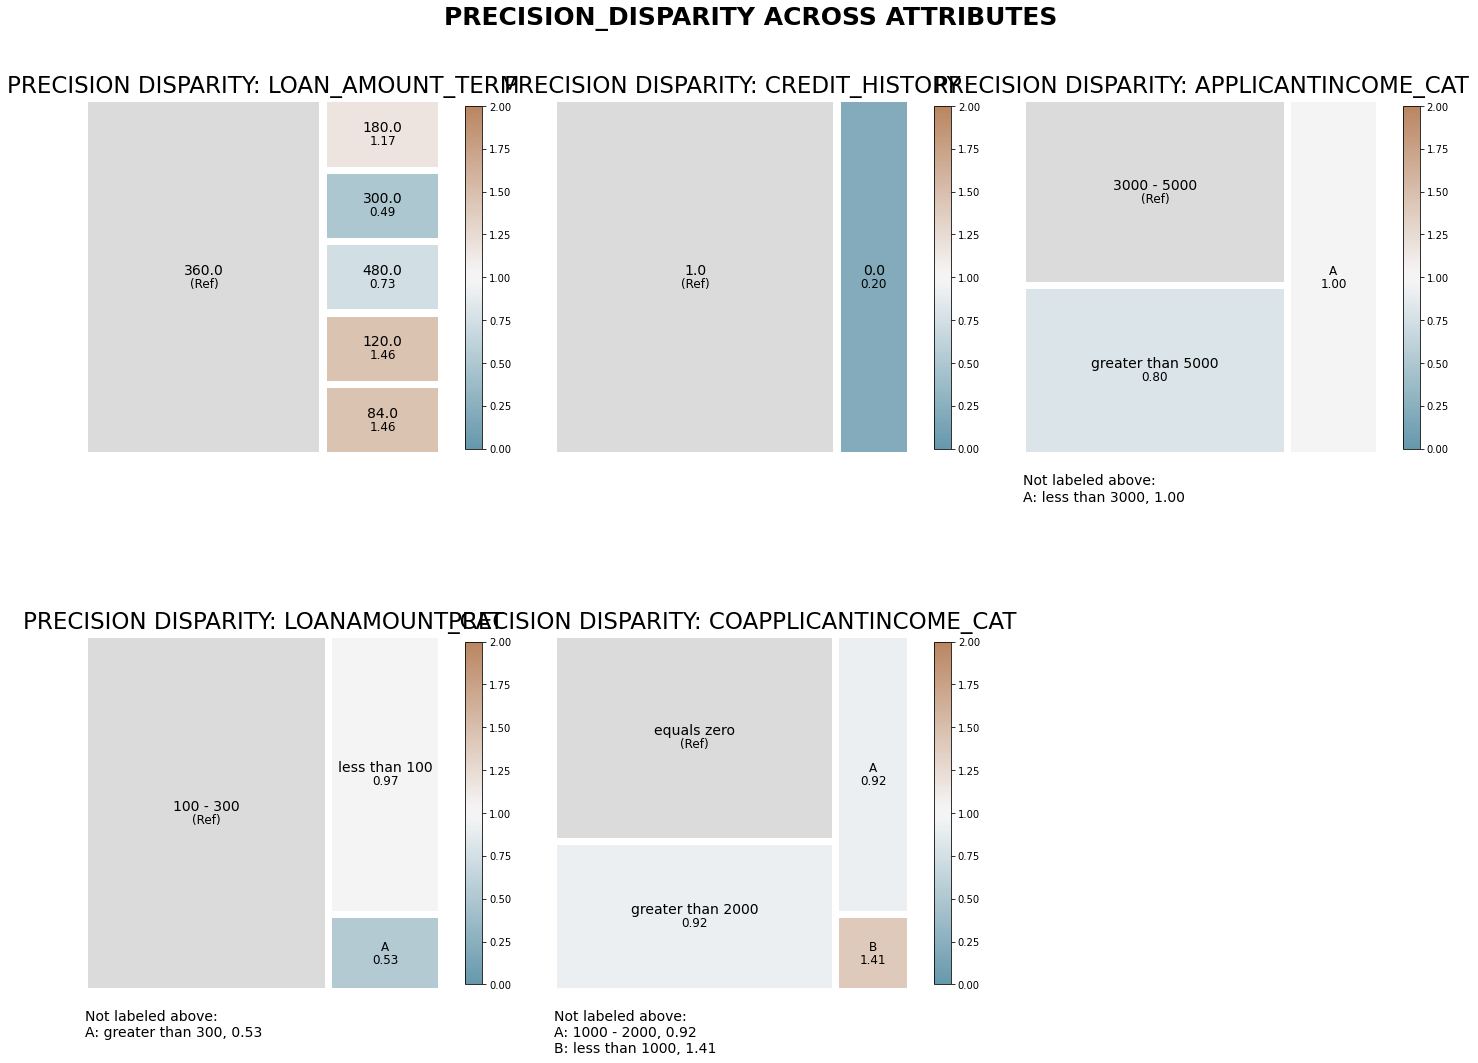

In [ ]:
aqp = Plot()
j = aqp.plot_disparity_all(majority_bdf, metrics=['precision_disparity'], significance_alpha=0.05)

The Aequitas Fairness() class allows us to evaluate our model's fairness using various metrics such as false positive rate parity or false negative rate parity.


Below also shows: *Type I Parity*: Fairness in both FDR Parity and FPR Parity

*Type II Parity*: Fairness in both FOR Parity and FNR Parity

*Equalized Odds*: Fairness in both FPR Parity and TPR Parity

*Unsupervised Fairness*: Fairness in both Statistical Parity and Impact Parity

*Supervised Fairness*: Fairness in both Type I and Type II Parity

*Overall Fairness*: Fairness across all parities for all attributes

In [ ]:
# generates fairness metrics for each attribute-value combination in the data
f = Fairness()
fdf = f.get_group_value_fairness(majority_bdf)

In [ ]:
# shows if there are significant differences in the model performance across different subgroups, after comparing the results we can see there are differences!
parity_detrminations = f.list_parities(fdf)

In [ ]:
# displays table below with fairness metrics and parity determinations for each group.
fdf[['attribute_name', 'attribute_value'] + absolute_metrics + calculated_disparities + parity_detrminations].dropna(thresh=len(xtab)*0.9, axis=1).style

,attribute_name,attribute_value,tpr,fdr,fnr,precision,ppr,pprev,prev,ppr_disparity,pprev_disparity,precision_disparity,fdr_disparity,tpr_disparity,Impact Parity,Supervised Fairness,Statistical Parity,Precision Parity,FDR Parity,TPR Parity,Unsupervised Fairness,Equalized Odds,TypeI Parity
0,Loan_Amount_Term,120.0,1.000000,0.000000,0.000000,1.000000,0.008621,1.000000,1.000000,0.009615,1.000000,1.464789,0.000000,1.000000,True,False,False,False,False,True,False,False,False
1,Loan_Amount_Term,180.0,1.000000,0.200000,0.000000,0.800000,0.043103,1.000000,0.800000,0.048077,1.000000,1.171831,0.630303,1.000000,True,False,False,True,False,True,False,True,False
2,Loan_Amount_Term,300.0,1.000000,0.666667,0.000000,0.333333,0.025862,1.000000,0.333333,0.028846,1.000000,0.488263,2.101010,1.000000,True,False,False,False,False,True,False,True,False
3,Loan_Amount_Term,360.0,1.000000,0.317308,0.000000,0.682692,0.896552,1.000000,0.682692,1.000000,1.000000,1.000000,1.000000,1.000000,True,False,True,True,True,True,True,True,True
4,Loan_Amount_Term,480.0,1.000000,0.500000,0.000000,0.500000,0.017241,1.000000,0.500000,0.019231,1.000000,0.732394,1.575758,1.000000,True,False,False,False,False,True,False,True,False
5,Loan_Amount_Term,84.0,1.000000,0.000000,0.000000,1.000000,0.008621,1.000000,1.000000,0.009615,1.000000,1.464789,0.000000,1.000000,True,False,False,False,False,True,False,False,False
6,Credit_History,0.0,1.000000,0.833333,0.000000,0.166667,0.206897,1.000000,0.166667,0.260870,1.000000,0.204444,4.509804,1.000000,True,False,False,False,False,True,False,True,False
7,Credit_History,1.0,1.000000,0.184783,0.000000,0.815217,0.793103,1.000000,0.815217,1.000000,1.000000,1.000000,1.000000,1.000000,True,False,True,True,True,True,True,True,True
8,ApplicantIncome_cat,3000 - 5000,1.000000,0.266667,0.000000,0.733333,0.387931,1.000000,0.733333,1.000000,1.000000,1.000000,1.000000,1.000000,True,False,True,True,True,True,True,True,True
9,ApplicantIncome_cat,greater than 5000,1.000000,0.414634,0.000000,0.585366,0.353448,1.000000,0.585366,0.911111,1.000000,0.798226,1.554878,1.000000,True,False,True,False,False,True,True,True,False


Interpretation of parities: Our base groups are ApplicantIncome, LoanAmount, and CoapplicantIncome, Credit_History, and Loan_Amount_Term.  By construction, the base group has supervised fairness. (The disparity ratio is 1). The fpr for most attributes are 1.0.



In [ ]:
# measures the level of fairness with respect to each metric for each group.
# helps us view only the calculated parities from the `get_group_value_fairness()` function at the attribute level.
gaf = f.get_group_attribute_fairness(fdf)
gaf

,model_id,score_threshold,attribute_name,Statistical Parity,Impact Parity,FDR Parity,FPR Parity,FOR Parity,FNR Parity,TPR Parity,TNR Parity,NPV Parity,Precision Parity,TypeI Parity,TypeII Parity,Equalized Odds,Unsupervised Fairness,Supervised Fairness
0,0,binary 0/1,ApplicantIncome_cat,False,True,False,True,NaN,NaN,True,NaN,NaN,False,False,NaN,True,False,False
1,0,binary 0/1,CoapplicantIncome_cat,False,True,False,True,NaN,NaN,True,NaN,NaN,False,False,NaN,False,False,False
2,0,binary 0/1,Credit_History,False,True,False,True,NaN,NaN,True,NaN,NaN,False,False,NaN,True,False,False
3,0,binary 0/1,LoanAmount_cat,False,True,False,True,NaN,NaN,True,NaN,NaN,False,False,NaN,True,False,False
4,0,binary 0/1,Loan_Amount_Term,False,True,False,True,NaN,NaN,True,NaN,NaN,False,False,NaN,False,False,False


Below, we are returning a dictionary with a determination across all attributes for each of: - Unsupervised Fairness - Supervised Fairness - Overall Fairness. gof shows overall fairness is False, which means that some of the fairness metrics are not meeting the fairness criteria. We would need to investigate further to find out which specific metrics are causing the overall fairness to be below fairness criteria.

In [ ]:
gof = f.get_overall_fairness(fdf)
gof

{'Unsupervised Fairness': False,
 'Supervised Fairness': False,
 'Overall Fairness': False}

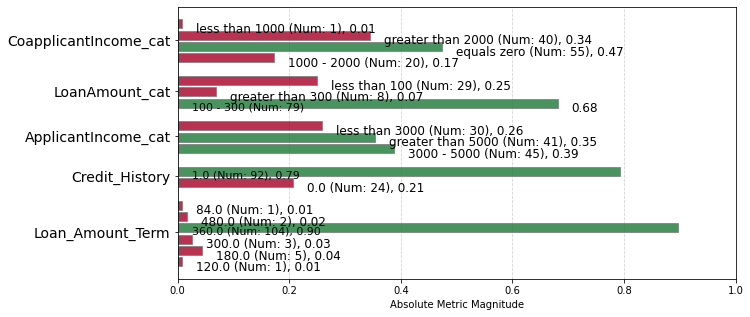

In [ ]:
z = aqp.plot_fairness_group(fdf, group_metric='ppr')

Mitigating Bias

To mitigate bias in the data, we can use two techniques: SMOTE oversampling and data normalization using MinMaxScaler. SMOTE will balance the data by creating more examples of underrepresented groups. Normalizing the data makes sure all features have a similar scale, so that no single feature dominates the results. This can prevent bias caused by features with larger ranges having more impact on the results compared to others. Conclusion: Before mitigating bias, we found that our model prouces a 68% accuracy, and we can see that applying mitigating bias decreases our accuracy rate (about 61%) on the test data which occurs after balancing and scaling.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess the data
X_train, X_test, y_train, y_test = train_test_split(data2, labels2, test_size=0.20, random_state=42)

# Print distribution before balancing
print("Before balancing:", Counter(y_train))

S=SMOTE()
X_train_data, y_train_data = S.fit_resample(X_train, y_train)

# Print distribution after balancing
print("After balancing:", Counter(y_train_data))

scalar = MinMaxScaler()
scalar.fit(X_train_data)

X_train_scaled = scalar.transform(X_train_data)
X_test_scaled = scalar.transform(X_test)

model 
model.fit(X_train_scaled, y_train_data,epochs=10, batch_size=32)

accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Before balancing: Counter({1: 324, 0: 138})
After balancing: Counter({0: 324, 1: 324})
Epoch 1/10
21/21 [==============================] - 0s 5ms/step - loss: 0.7309
Epoch 2/10
21/21 [==============================] - 0s 4ms/step - loss: 0.7080
Epoch 3/10
21/21 [==============================] - 0s 5ms/step - loss: 0.6942
Epoch 4/10
21/21 [==============================] - 0s 4ms/step - loss: 0.6847
Epoch 5/10
21/21 [==============================] - 0s 6ms/step - loss: 0.6767
Epoch 6/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6717
Epoch 7/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6699
Epoch 8/10
21/21 [==============================] - 0s 3ms/step - loss: 0.6625
Epoch 9/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6640
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6042
Accuracy: 60.42%
